Importing the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords


c:\Users\oshen geenath\anaconda3\envs\Sentiment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the dataset and reviewing it

In [2]:
df = pd.read_csv('Shuffled_CSV.csv')

In [3]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,EZhsez9rcRcnz5vzdDprgQ,Jcg0KyxNMTSlOeEfI78LMA,_9Z3cuZQBOGv_XzSG4ewHA,1,5,1,0,Went this afternoon for a birthday lunch. It w...,2015-06-10 21:51:10
1,UASULpgxM45JQdbuAk4o2g,6s-g2vFu12OemhiK3FJuOQ,G_VpU7J9do8ZRCLIblDBZA,3,5,1,5,"Located near Drexel and UPenn, Han-Wool (Korea...",2008-03-31 03:11:46
2,4NuztpkW80grQEdbRJ1HKw,NzmoFvh-YIXSJU8_k6jgdA,X7yGrz7oDbt8UY5rdmJc_w,5,1,0,0,This place has the best lunch buffet in the ci...,2019-03-23 23:16:18
3,LzQkTCQfO3DVXE52TKo6VA,u1LTgEJmd8FZmDxxrgHwGw,3iSRhLUZfZSlLaQw-BzloQ,5,0,0,0,This is by far my favorite spot in Nashville f...,2018-05-20 06:37:13
4,wf-W_7E6uNJmXiSiMdvPsw,Vwslifegl59fQVOe5BH1gw,RUCsFlBuA80Wc9PmYzmayQ,3,2,0,1,This round-the-corner clothing version of the ...,2011-08-25 21:55:33
...,...,...,...,...,...,...,...,...,...
74995,UniXnVymUjCW9mKoN_JKQA,_qpZgV3vrYUYvBD5MDW6oQ,rz325HFuVeo1qZgrnFw8YA,2,1,1,1,Staff is super friendly! I live by the area an...,2020-03-09 19:42:48
74996,0kPJptO5U5vl5gikPrqNMw,-ftREF8vomubEfe8_CdE_w,x3RBrF6nJqhPU-8MXOA27g,1,1,0,0,Patron Alert. First time ever at Peggy O'Neill...,2019-09-30 01:48:28
74997,RZyyNSRNoqd7SRcmM2nl5w,uXA2S9glwAFZ-boRNhkeVQ,2OXCAbz3x_MrQSYj1zarIA,1,2,1,1,"Good food, TERRIBLE service. Everyone we encou...",2017-10-29 17:51:52
74998,DHNUXvNWGtAzMPKzutSJrw,rzRuWYc9-JOCtx2VbcxaZg,HP-GplR7ekZZpfLsupRSVA,1,2,0,0,I miss Siamese Thai so much. You can tell this...,2016-09-24 16:19:01


In [4]:
print(df.shape)

(500, 9)


In [5]:
#Print the header
Header = df.head(5)
print(Header)

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

Doing some EDA

In [6]:
# check for null values
null_Values = df.isnull().sum()
print(null_Values)

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [7]:
#Finding the languages 
from langdetect import detect
for i in range (len(df["text"])):
    language = detect(df['text'][i])
    if language != 'en':
        print(language)
        print(df['text'][i])
        print(i)
        df.drop(i, inplace=True)
        

In [8]:
df.reset_index(drop=True, inplace=True)


In [9]:
df['text'][0]

"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."

In [10]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
495,2DTSLWrxArBe6iNGTJhRZQ,PyYBky3iWH9Fo_bUxoYyDQ,n-iPn34tLaqnq-dI8m8Bkw,3,2,0,0,Went for a bachelorette party on a Saturday ni...,2016-04-11 17:33:05
496,5I7qACNaxm0PBdpgaMeQ5w,8sHWQwfi9blO7fdpHMVfsw,CjkxTRergWcYWb4SVW3gxw,5,0,0,1,Hands down best fall off the bone BBQ I've eve...,2017-06-06 19:22:05
497,yFV9UnuTR3wqCVRwkeYGxA,tgZ0r69ap3_-sNBgLPZsPw,C_EtrXTygRX5RTUOKtO6Dg,1,0,0,0,It's a good thing I've had a few weeks to cool...,2016-08-25 18:34:30
498,WZIOWWb6xVwCA2-uJ47m8Q,XeS-0ONS5uoR_OfgZQebrA,vN6v8m4DO45Z4pp8yxxF_w,5,0,0,0,Best shrimp and grits in NOLA! Delicious fresh...,2017-01-02 14:24:15


In [11]:
nltk.download('stopwords')
",".join(stopwords.words("english"))
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\oshen
[nltk_data]     geenath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Define the remove_stop_words function
def remove_stop_words(x):
    return " ".join([word for word in str(x).split() if word.lower() not in stop_words])

# Apply the function to create a new column 'filtered_text'
df['filtered_text'] = df['text'].apply(lambda x: remove_stop_words(x))

In [13]:
df['filtered_text'][0]

'decide eat here, aware going take 2 hours beginning end. tried multiple times, want like it! locations NJ never bad experience. food good, takes long time come out. waitstaff young, usually pleasant. many experiences spent way long waiting. usually opt another diner restaurant weekends, order done quicker.'

In [14]:
duplicates = df.duplicated().sum()
print(duplicates)


0


Visualizing the dataset

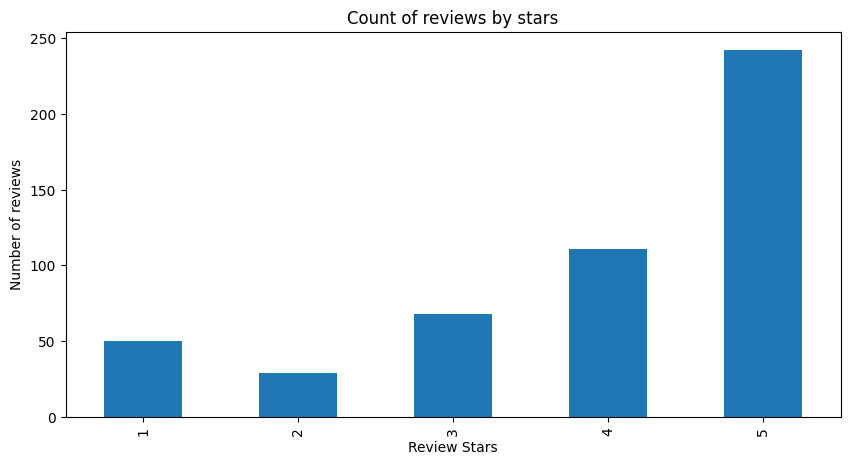

In [15]:
Bar_plot = df["stars"].value_counts().sort_index() \
    .plot(kind='bar',
           title="Count of reviews by stars",
           figsize=(10,5))

Bar_plot.set_xlabel('Review Stars')
Bar_plot.set_ylabel('Number of reviews')
plt.show()

In [16]:
#Categorizing the reviews according to the stars(2 for positive, 1 for neutral, 3 for negative). 
df["Reviews"] = df["stars"].apply(lambda score: 2 if score >= 4 else 1 if score == 3 else 0)

In [18]:
df["Reviews"].value_counts()

Reviews
2    353
0     79
1     68
Name: count, dtype: int64

In [19]:
New_DataFrame = df[['filtered_text','Reviews']]

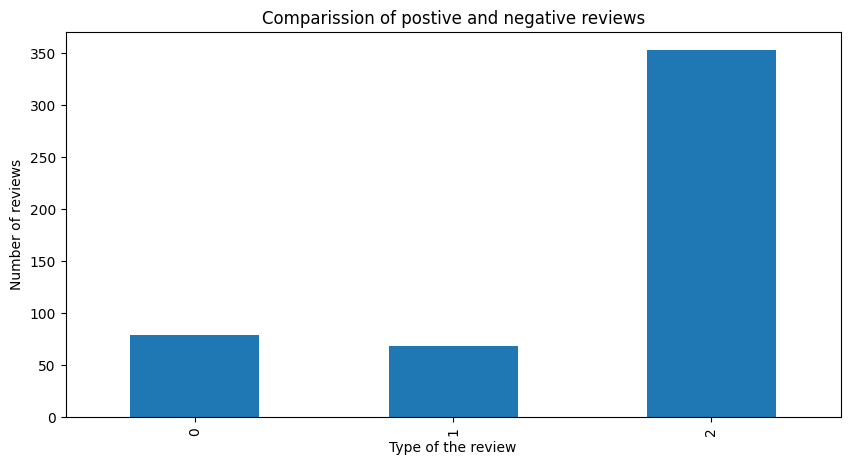

In [20]:
Bar_plot = df["Reviews"].value_counts().sort_index() \
    .plot(kind='bar',
           title="Comparission of postive and negative reviews",
           figsize=(10,5))

Bar_plot.set_xlabel('Type of the review')
Bar_plot.set_ylabel('Number of reviews')
plt.show()

In [21]:
New_DataFrame.head(5)

,filtered_text,Reviews
0,"decide eat here, aware going take 2 hours begi...",1
1,"I've taken lot spin classes years, nothing com...",2
2,Family diner. buffet. Eclectic assortment: lar...,1
3,"Wow! Yummy, different, delicious. favorite lam...",2
4,Cute interior owner (?) gave us tour upcoming ...,2


Splitting the dataset as Train and Test

In [22]:
# Splitting the dataset into training and testing datasets
train_Text_Data, test_Text_Data, train_label_Data, test_labels_Data = train_test_split(New_DataFrame['filtered_text'], New_DataFrame['Reviews'], test_size=0.2,stratify=New_DataFrame["Reviews"], random_state=1)

In [23]:
print(train_Text_Data.size)
print(test_labels_Data.size)

400
100


In [24]:
#Loading the Pre-Trained model with the tokenizer
model_Name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_Name)
tokenizer = AutoTokenizer.from_pretrained(model_Name)

In [25]:
# Tokenizing the input text data
train_text_encodings = tokenizer(train_Text_Data.tolist(), truncation=True, padding=True)
test_text_encodings = tokenizer(test_Text_Data.tolist(), truncation=True, padding=True)

In [26]:
# Convert labels and encodings in dataset objects
train_Dataset_Object = TensorDataset(torch.tensor(train_text_encodings['input_ids']),
                              torch.tensor(train_text_encodings['attention_mask']),
                              torch.tensor(train_label_Data.tolist()))
test_Dataset_Object = TensorDataset(torch.tensor(test_text_encodings['input_ids']),
                             torch.tensor(test_text_encodings['attention_mask']),
                             torch.tensor(test_labels_Data.tolist()))

In [27]:
# Creating the train loaders using the dataset objects
train_Data_Loader = DataLoader(train_Dataset_Object, batch_size=4, shuffle=True)
test_Data_Loader = DataLoader(test_Dataset_Object, batch_size=4, shuffle=False)

In [28]:
# Setting the device for GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cpu


In [29]:
# Training hyperparameters
epochs = 1
optimizer = torch.optim.AdamW(model.parameters(),
                              weight_decay=0.01,
                              lr=2e-5)

In [30]:
# Training loop
train_losses = []
start_time = time.time()

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    # Creating a progress bar for batches
    progress_bar = tqdm(enumerate(train_Data_Loader, 1), total=len(train_Data_Loader), desc=f'Epoch {epoch + 1}/{epochs}')

    for batch_idx, batch in progress_bar:
        input_ids, attention_mask, Reviews = map(lambda x: x.to(device), batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=Reviews)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Calculating average training loss for each epoch
        avg_epoch_loss = epoch_loss / batch_idx
        train_losses.append(avg_epoch_loss)

        progress_bar.set_postfix({'Training Loss': avg_epoch_loss})

    # Calculate and display the total training time at the end of each epoch
    elapsed_Total_Time = time.time() - start_time
    total_minutes = elapsed_Total_Time / 60
    print(f'Total Training Time for Epoch {epoch + 1}: {elapsed_Total_Time:.2f} minutes')


Epoch 1/1: 100%|██████████| 100/100 [15:54<00:00,  9.54s/it, Training Loss=0.637]

Total Training Time for Epoch 1: 954.21 minutes


In [31]:
# Save the trained model to the local pc
model.save_pretrained('Models')
tokenizer.save_pretrained('Tokens')

print("Model saved......")

Model saved......


Loading the model to do predictions

In [32]:
# Loading the saved fine-tuned model to get predictions
tokenizer = AutoTokenizer.from_pretrained('Tokens')
model = AutoModelForSequenceClassification.from_pretrained('Models')

# Setting the device for GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Using device: {device}")

def get_predictions(review):
    # Tokenizing the user review
    input_Data = tokenizer(review,truncation=True, padding=True,return_tensors='pt',)
    input_ids = input_Data['input_ids'].to(device)
    attention_mask = input_Data['attention_mask'].to(device)

    # Getting the model prediction according to the user review
    with torch.no_grad():
        Prediction = model(input_ids, attention_mask=attention_mask)

    # Getting the predicted labels
    logits = Prediction.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    return predicted_class


Using device: cpu


Testing the model

In [33]:
#Getting user reviews
user_Review = "Wow that is delicious"

In [34]:
review_Prediction = get_predictions(user_Review)
if review_Prediction == 2:
    print("Positive Feedback.")
elif review_Prediction == 0:
    print("Negative Feedback.")
else:
    print("Neutral Feedback")

Positive Feedback.


Evaluations of the model

In [35]:
# Evaluating the model
model.eval()
review_Predictions = []
ground_Truth = []

with torch.no_grad():
    for batch in test_Data_Loader:
        input_ids, attention_mask, Reviews = map(lambda x: x.to(device), batch)
        prediction_Results = model(input_ids, attention_mask=attention_mask)
        logits = prediction_Results.logits
        review_Predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        ground_Truth.extend(Reviews.cpu().numpy())


In [36]:
test_Data_Accuracy = accuracy_score(ground_Truth, review_Predictions)
print(f"The test data accuracy is : {test_Data_Accuracy}")

The test data accuracy is : 0.79


In [37]:
# Calculating the cunfusion matrix
confusion = confusion_matrix(ground_Truth, review_Predictions)

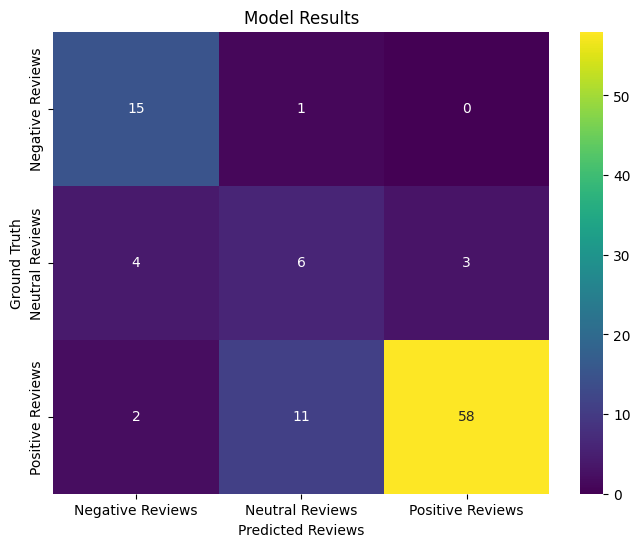

In [40]:
# PLotting the confusion matrix in a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis', xticklabels=['Negative Reviews',"Neutral Reviews", 'Positive Reviews'],yticklabels=['Negative Reviews',"Neutral Reviews", 'Positive Reviews'])
plt.title('Model Results')
plt.xlabel('Predicted Reviews')
plt.ylabel('Ground Truth')

plt.show()

In [39]:
print(classification_report(ground_Truth, review_Predictions,target_names=['Negative reviews','Neutral Reviews', 'Postive reviews']))

                  precision    recall  f1-score   support

Negative reviews       0.71      0.94      0.81        16
 Neutral Reviews       0.33      0.46      0.39        13
 Postive reviews       0.95      0.82      0.88        71

        accuracy                           0.79       100
       macro avg       0.67      0.74      0.69       100
    weighted avg       0.83      0.79      0.80       100
